In [2]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [7]:
df.shape

(645675, 5)

In [8]:
df.dtypes

,0
dt,object
AverageTemperature,float64
AverageTemperatureUncertainty,float64
State,object
Country,object


In [9]:
df.isnull().sum()

,0
dt,0
AverageTemperature,25648
AverageTemperatureUncertainty,25648
State,0
Country,0


In [11]:
df = df.dropna(how='any',axis='rows')

In [12]:
df.shape

(620027, 5)

In [13]:
df.rename(columns={'dt':'date','AverageTemperature':'Avg_Temp','AverageTemperatureUncertainty':'Avg_Temp_Uncertainity'},inplace=True)
df.head()

,date,Avg_Temp,Avg_Temp_Uncertainity,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [14]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='date', length=620027, freq=None)

In [15]:
df.describe()

,Avg_Temp,Avg_Temp_Uncertainity
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [16]:
df['Year'] = df.index.year
df.head()

,Avg_Temp,Avg_Temp_Uncertainity,State,Country,Year
date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [18]:
df.describe()

,Avg_Temp,Avg_Temp_Uncertainity,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [29]:
# getting data year from 1980 to 2013
latest_df = df[(df['Year'] >= 1980) & (df['Year'] <= 2013)]
latest_df.head()

,Avg_Temp,Avg_Temp_Uncertainity,State,Country,Year
date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [30]:
latest_df[['Country','Avg_Temp']].groupby(['Country']).mean().sort_values('Avg_Temp')

,Avg_Temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


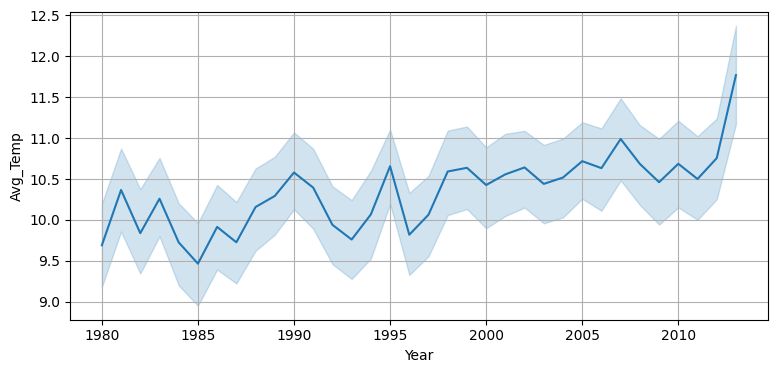

In [34]:
plt.figure(figsize=(9,4))
sns.lineplot(x="Year",y="Avg_Temp",data=latest_df)
plt.grid()

In [32]:
resample_df = latest_df[['Avg_Temp']].resample('A').mean()
resample_df.head()

,Avg_Temp
date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


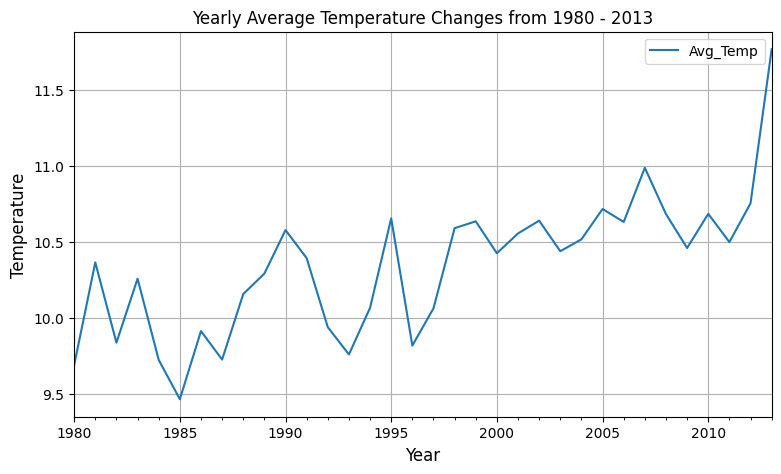

In [36]:
resample_df.plot(title='Yearly Average Temperature Changes from 1980 - 2013',figsize=(9,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend(loc = "best")
plt.grid()

In [39]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results: ')
test_df = adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results: 
Test Statistic                 -0.728209
p-value                         0.839307
#Lags Used                      2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [41]:
# Replace 'freq' with 'period'
decomp = seasonal_decompose(resample_df, period=3)  # Assuming yearly data, period=12

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid



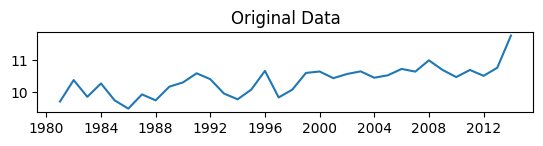

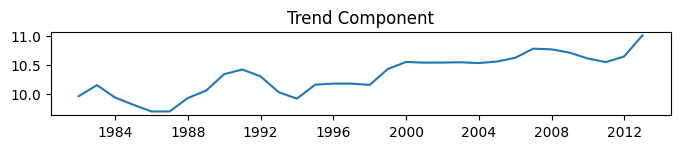

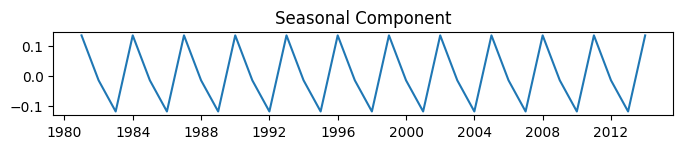

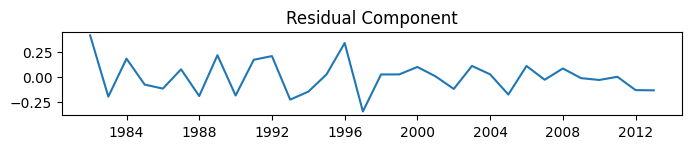

<Figure size 800x500 with 0 Axes>

In [46]:
plt.subplot(411)
plt.plot(resample_df)
plt.title('Original Data')
plt.figure(figsize=(8,5))
print()
plt.subplot(412)
plt.plot(trend)
plt.title('Trend Component')
plt.figure(figsize=(8,5))
print()
plt.subplot(413)
plt.plot(seasonal)
plt.title('Seasonal Component')
plt.figure(figsize=(8,5))
print()
plt.subplot(414)
plt.plot(residual)
plt.title('Residual Component')
plt.figure(figsize=(8,5))

plt.tight_layout()



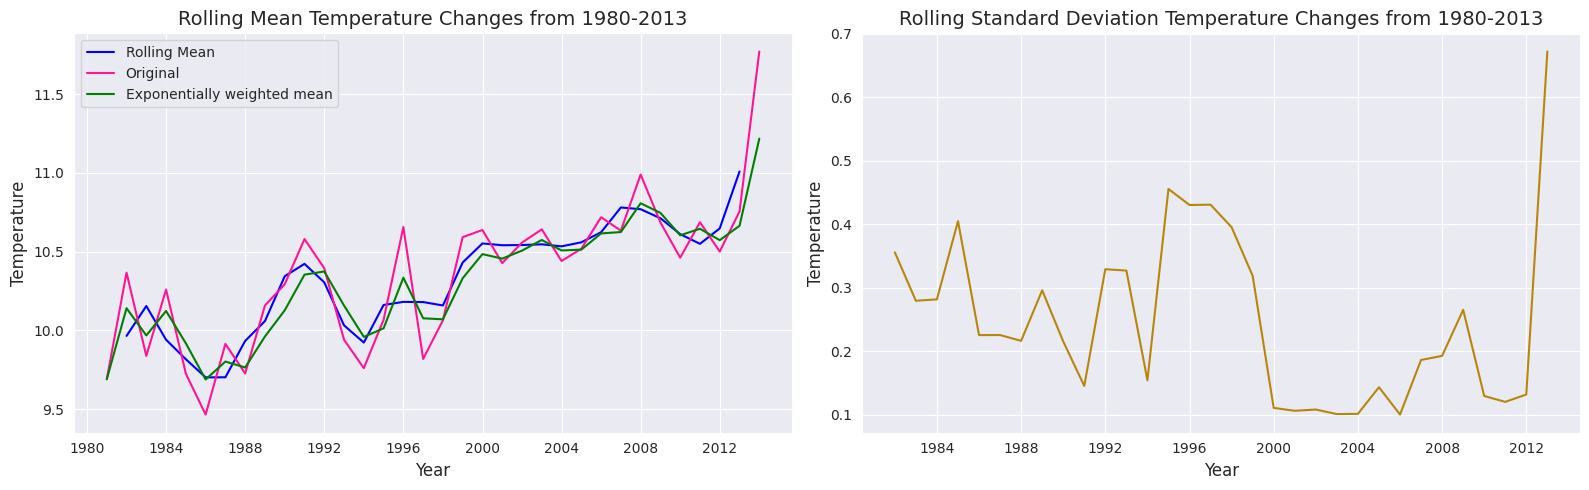

In [63]:
rol_mean  = resample_df.rolling(window=3,center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3,center=True).std()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))

ax1.plot(rol_mean,color='blue',label='Rolling Mean')
ax1.plot(resample_df,color='deeppink',label='Original')
ax1.plot(ewm,color='green',label='Exponentially weighted mean')
ax1.set_title('Rolling Mean Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend(loc = "best")
ax1.grid()

ax2.plot(rol_std,color='darkgoldenrod',label='Rolling Std')
ax2.set_title('Rolling Standard Deviation Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax1.legend(loc = "best")
ax1.grid()

plt.tight_layout()
plt.show()




In [66]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
rol_std.dropna(inplace=True)

print('Dickey-Fuller Test Results for the Rolling mean: ')
df_test = adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

print("====================================================")

print('Dickey-Fuller Test Results for the Exponentially weighted mean: ')
df_test = adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

print("====================================================")

print('Dickey-Fuller Test Results for the Rolling standard deviation: ')
df_test = adfuller(rol_std.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)


Dickey-Fuller Test Results for the Rolling mean: 
Test Statistic                  0.275101
p-value                         0.976173
#Lags Used                      8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64
Dickey-Fuller Test Results for the Exponentially weighted mean: 
Test Statistic                 -0.338693
p-value                         0.919843
#Lags Used                      2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64
Dickey-Fuller Test Results for the Rolling standard deviation: 
Test Statistic                 -2.636861
p-value                         0.085616
#Lags Used                      0.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Val

In [67]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
print(diff_rol_mean.head())
print("====================================")
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
print(diff_ewm.head())

            Avg_Temp
date                
1981-12-31  0.401781
1982-12-31 -0.316726
1983-12-31  0.318708
1984-12-31 -0.091684
1985-12-31 -0.236199
            Avg_Temp
date                
1980-12-31  0.000000
1981-12-31  0.225574
1982-12-31 -0.129877
1983-12-31  0.136118
1984-12-31 -0.192797


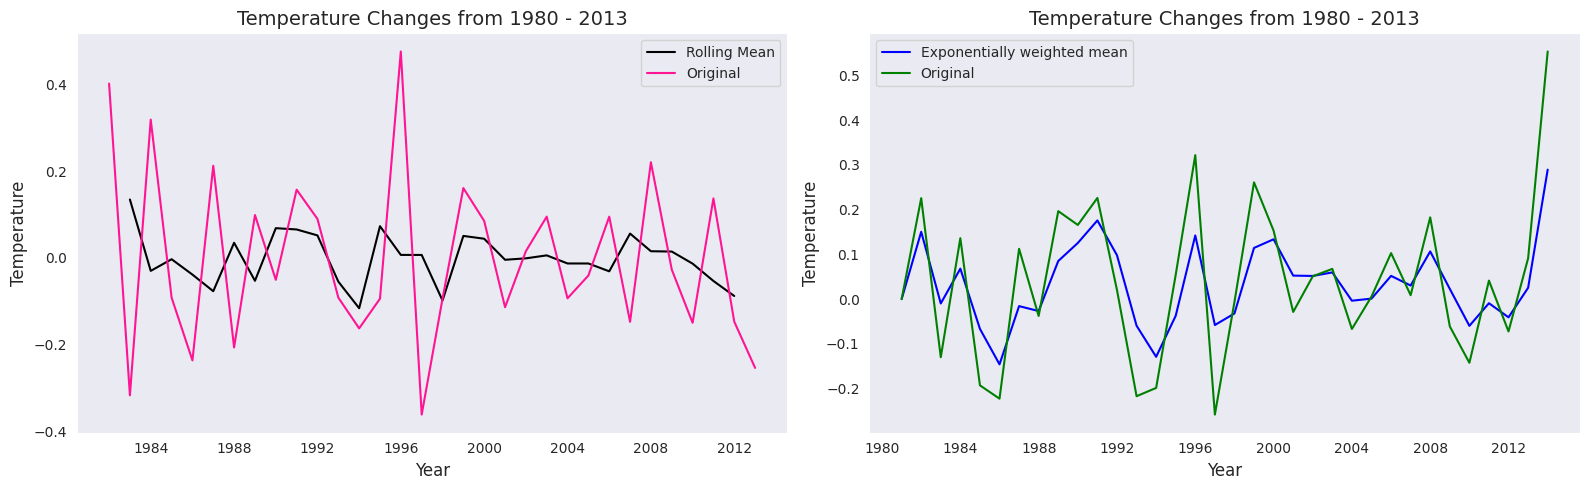

In [71]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3,center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))

ax1.plot(df_rol_mean_diff,color='black',label='Rolling Mean')
ax1.plot(diff_rol_mean,color='deeppink',label='Original')
ax1.set_title('Temperature Changes from 1980 - 2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend(loc = "best")
ax1.grid()

ax2.plot(df_ewm_diff,color='blue',label='Exponentially weighted mean')
ax2.plot(diff_ewm,color='green',label='Original')
ax2.set_title('Temperature Changes from 1980 - 2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend(loc = "best")
ax2.grid()

plt.tight_layout()
plt.show()

In [72]:
print('Dickey-Fuller Test for the difference between the original and  the Rolling mean: ')
df_test = adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

print("====================================================")

print('Dickey-Fuller Test for the difference between the original and the Exponentially weighted mean: ')
df_test = adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey-Fuller Test for the difference between the original and  the Rolling mean: 
Test Statistic                -7.007710e+00
p-value                        7.051586e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64
Dickey-Fuller Test for the difference between the original and the Exponentially weighted mean: 
Test Statistic                 -4.297446
p-value                         0.000449
#Lags Used                      1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


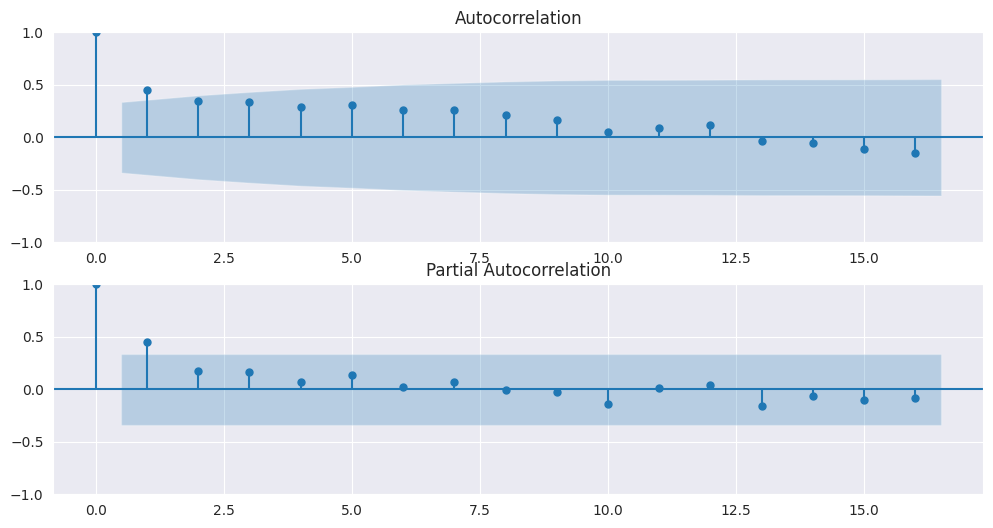

In [78]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(12,6))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
pyplot.show()

In [84]:
# appling the sarima to forcasting the data
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the SARIMA model
model = SARIMAX(resample_df,
                order=(1, 1, 1),                # (p, d, q) for ARIMA
                seasonal_order=(1, 1, 1, 12))    # (P, D, Q, s) for seasonal order with yearly seasonality (12 for monthly data)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Avg_Temp   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -8.379
Date:                            Fri, 07 Feb 2025   AIC                             26.758
Time:                                    22:19:49   BIC                             31.981
Sample:                                12-31-1980   HQIC                            27.892
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2376      0.659      0.361      0.718      -1.054       1.529
ma.L1         -0.9887      8.395   

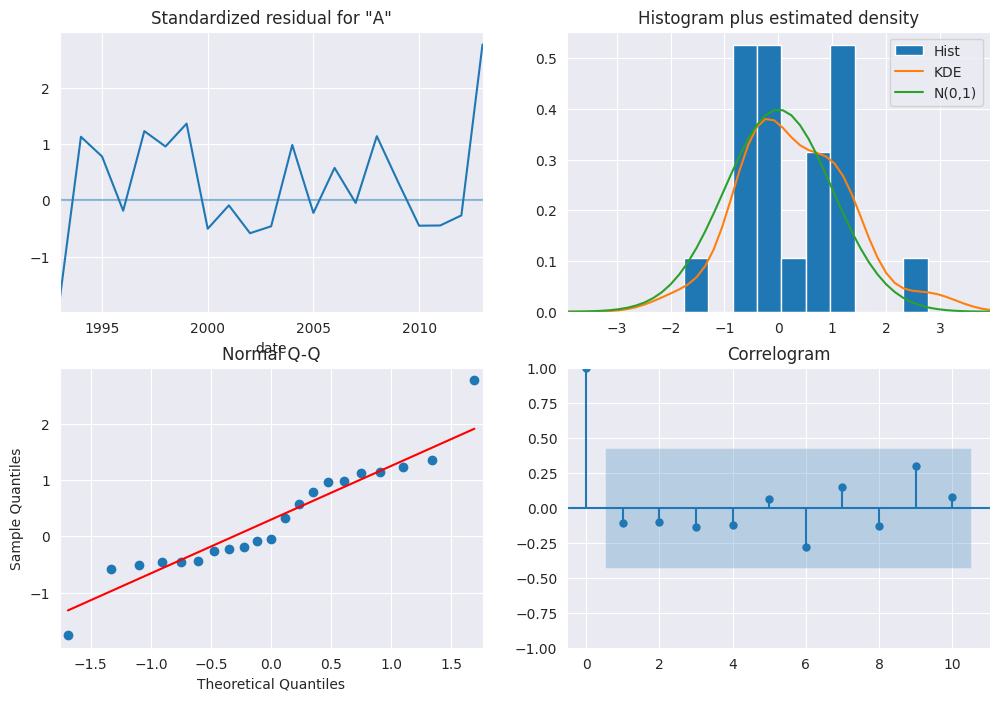

In [85]:
# Plot the diagnostics (optional)
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [86]:
# Forecasting the next 12 periods (e.g., next 12 months)
forecast = model_fit.forecast(steps=12)

# Print the forecasted values
print("Forecasted values for the next 12 periods:")
print(forecast)

Forecasted values for the next 12 periods:
2014-12-31    11.464130
2015-12-31    11.151089
2016-12-31    10.846592
2017-12-31    11.018670
2018-12-31    10.974403
2019-12-31    11.487611
2020-12-31    10.790463
2021-12-31    10.816109
2022-12-31    11.301745
2023-12-31    11.244996
2024-12-31    11.309264
2025-12-31    11.473088
Freq: YE-DEC, Name: predicted_mean, dtype: float64


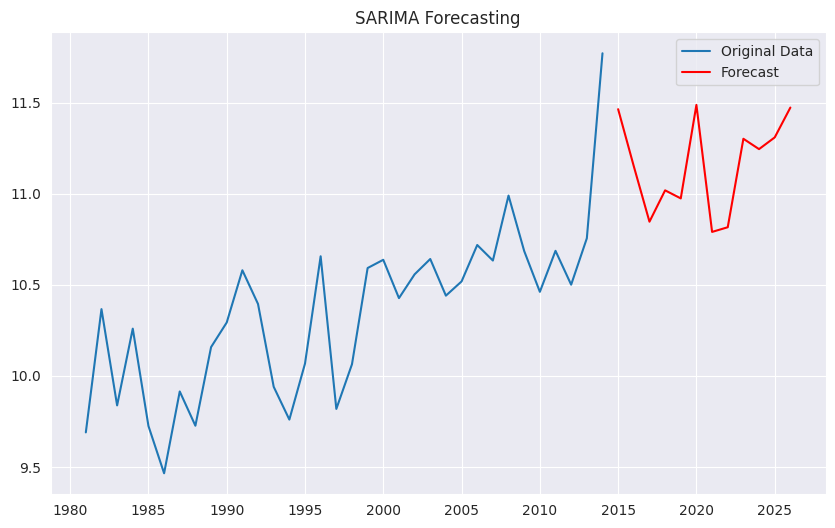

In [87]:
# Plot the original data along with the forecast
plt.figure(figsize=(10, 6))
plt.plot(resample_df, label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('SARIMA Forecasting')
plt.show()